Reading Data

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
import seaborn as sns
from ipywidgets import  widgets
import missingno as msno 
#from empiricaldist import Pmf as PMF
sns.set_style('whitegrid')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_excel('/content/drive/My Drive/anz/ANZ synthesised transaction dataset.xlsx')

In [0]:
data.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


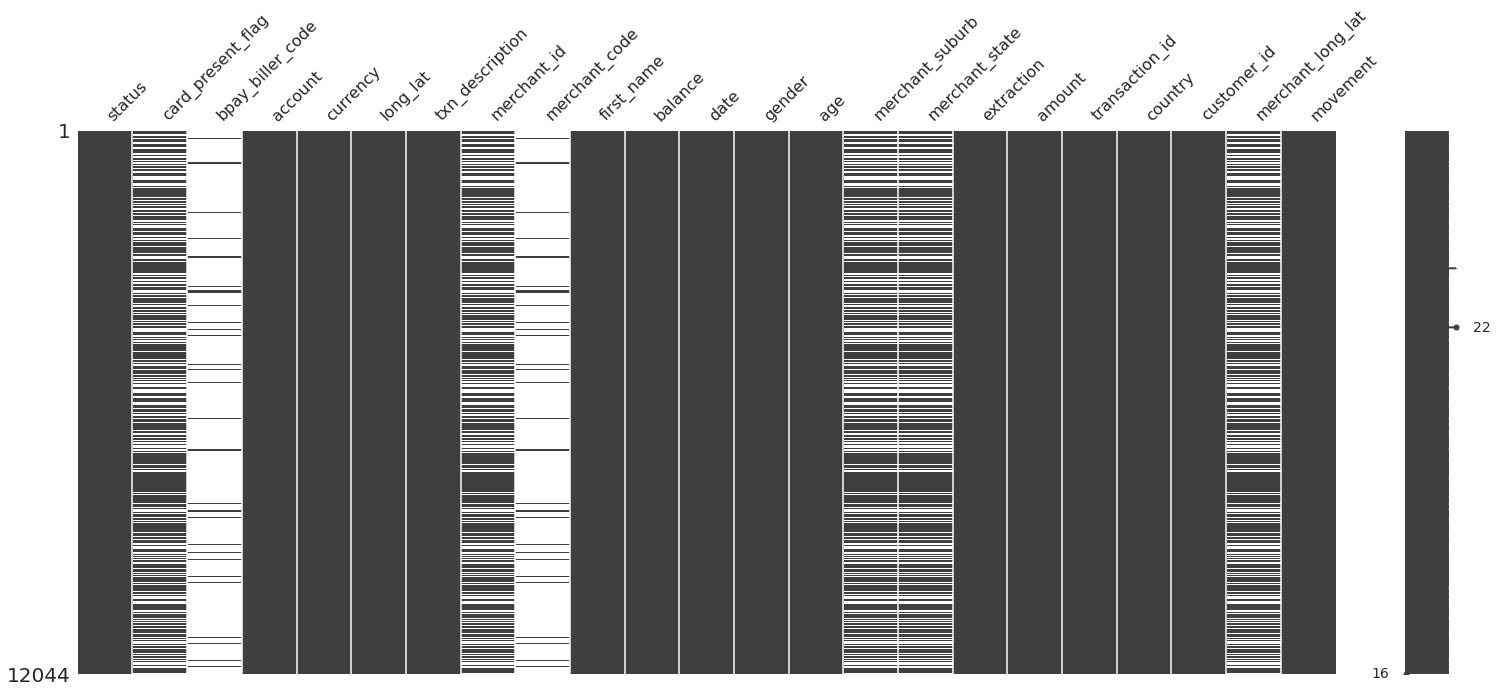

In [0]:
msno.matrix(data) 

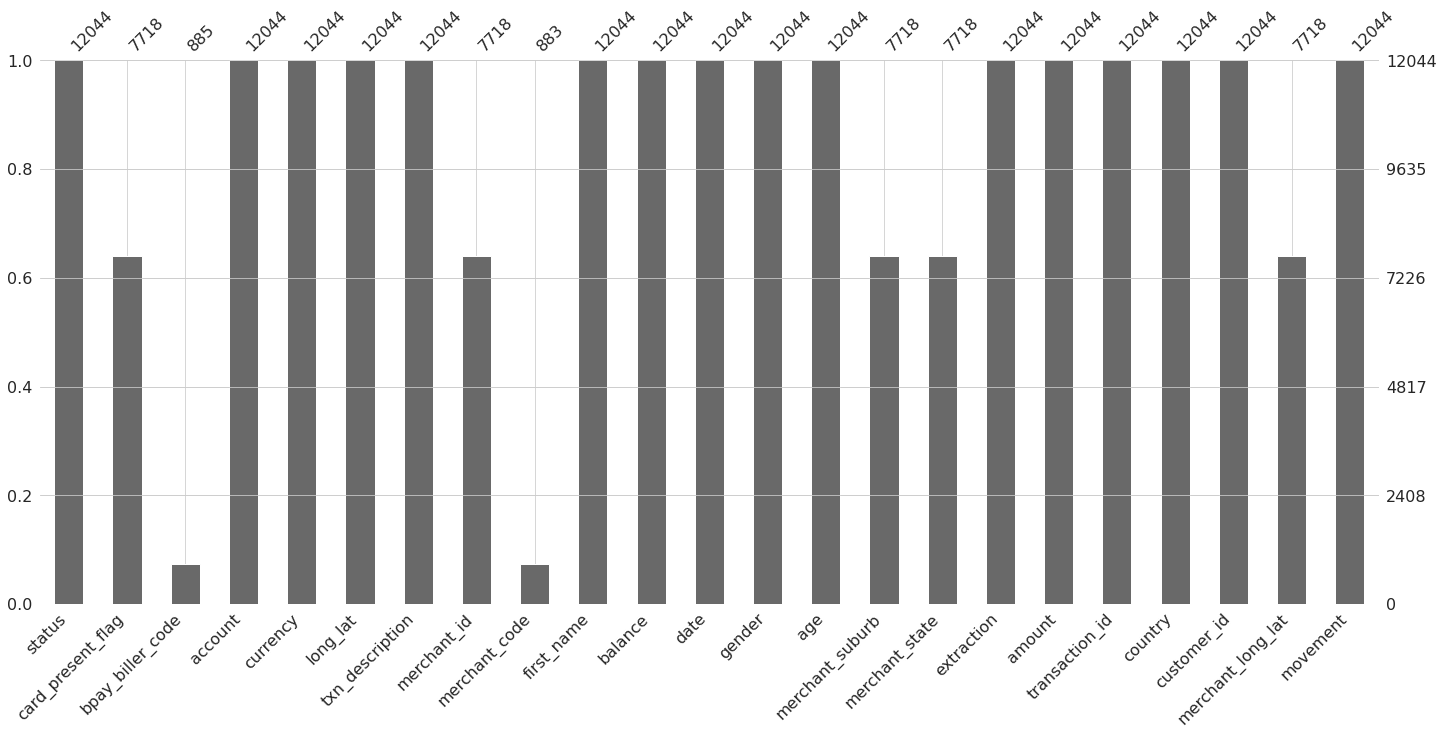

In [0]:
msno.bar(data)

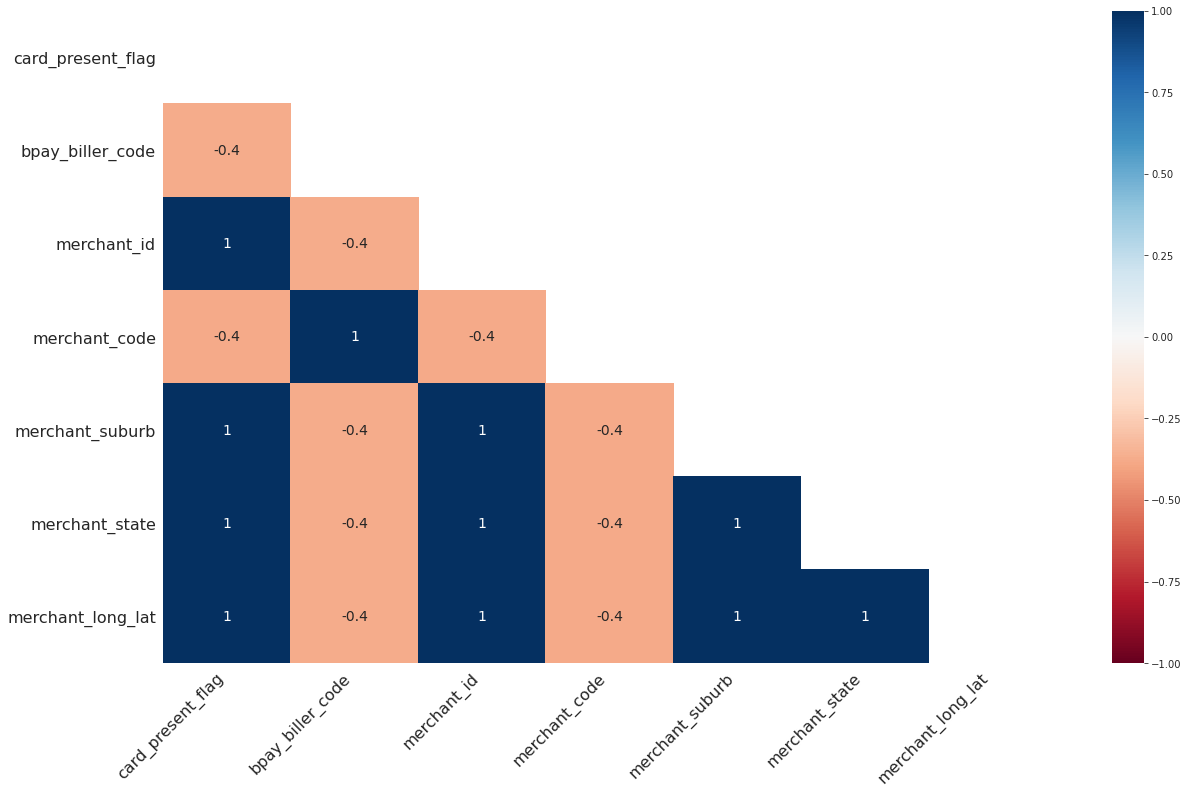

In [0]:
msno.heatmap(data) 

In [0]:
a_test=data.groupby(['customer_id','movement'])['gender'].count().unstack()

In [0]:
a_test.dropna(inplace=True)

In [0]:
data[data['movement']=='debit'].resample('M',on='date')[['amount']].sum()

,amount
date,
2018-08-31,170121.19
2018-09-30,213954.60
2018-10-31,1202630.56


In [0]:
grouped=data.groupby(['customer_id','movement']).resample('M',on='date')

In [0]:
a=grouped['amount'].mean()

In [0]:
a=a.to_frame()

In [0]:
a['mean_sum']=grouped['amount'].sum()

In [0]:
a.head()

amount   mean_sum
customer_id    movement date                                
CUS-0000000    debit    2018-10-31  999999.000000  999999.00
CUS-1005756958 credit   2018-08-31     970.470000    3881.88
                        2018-09-30     970.470000    3881.88
                        2018-10-31     970.470000    4852.35
               debit    2018-08-31      49.076522    2257.52

In [0]:
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [0]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11159
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11161
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [0]:
data['months']=data['date'].dt.strftime("%m")

In [0]:
summary={'txn_description':'count','amount':'mean'}

In [0]:
df=data[data['txn_description'].str.contains("PAY/SALARY")].groupby(by=['customer_id','months','age','gender']).agg(summary).reset_index()

In [0]:
df.head()

,customer_id,months,age,gender,txn_description,amount
0,CUS-1005756958,08,53,F,4,970.47
1,CUS-1005756958,09,53,F,4,970.47
2,CUS-1005756958,10,53,F,5,970.47
3,CUS-1117979751,08,21,M,2,3578.65
4,CUS-1117979751,09,21,M,2,3578.65


In [0]:
df['txn_description']=df['txn_description'].astype("int")

In [0]:
d=df.groupby(["customer_id"])[['txn_description','amount','age']].median().reset_index()

In [0]:
d.head()

,customer_id,txn_description,amount,age
0,CUS-1005756958,4,970.47,53
1,CUS-1117979751,2,3578.65,21
2,CUS-1140341822,2,1916.51,28
3,CUS-1147642491,4,1711.39,34
4,CUS-1196156254,2,3903.73,34


In [0]:
d['annual_salary']=list(map(lambda x:52 if x==4 else 26,d['txn_description']))*d['amount']

In [0]:
d['annual_salary'].describe()

count       100.000000
mean      70227.794000
std       34613.909024
min       25567.360000
25%       46217.340000
50%       60176.610000
75%       89608.675000
max      229735.480000
Name: annual_salary, dtype: float64

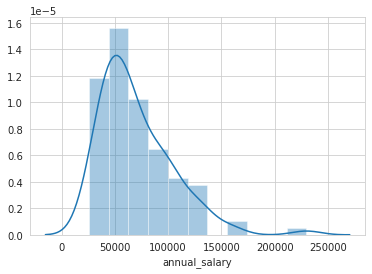

In [0]:
sns.distplot(d['annual_salary'])

In [0]:
import plotly.express as px
df = d['annual_salary']
fig = px.histogram(df, x="annual_salary",nbins=40)
fig.show()

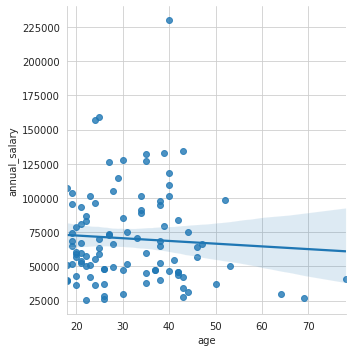

In [0]:
sns.lmplot(x='age',y='annual_salary',data=d)

In [0]:
df['freq']=df['txn_description'].mean()

KeyError: ignored

In [0]:
def sal_count(df,colname):
  # Initialize an empty dictionary: langs_count
  salary_count = {}
    
  # Extract column from DataFrame: col
  col = df[colname]
  
  # Iterate over lang column in DataFrame
  for entry in col:

      # If the language is in langs_count, add 1
      if entry in salary_count.keys():
          salary_count[entry]+=1
      # Else add the language to langs_count, set the value to 1
      else:
          salary_count[entry]=1

  # Return the langs_count dictionary
  return salary_count

In [0]:
sal_count(df,'months')

In [0]:
data[['customer_id','gender']].drop_duplicates('customer_id')

,customer_id,gender
0,CUS-2487424745,F
2,CUS-2142601169,M
3,CUS-1614226872,F
5,CUS-2688605418,M
6,CUS-4123612273,F
...,...,...
386,CUS-2819545904,M
450,CUS-3395687666,M
702,CUS-1147642491,F
706,CUS-261674136,M


In [0]:
merged_df=d.merge(data[['customer_id','gender']].drop_duplicates('customer_id'),on='customer_id',how='right')

In [0]:
merged_df.dropna(inplace=True)

In [0]:
merged_df.shape

(100, 6)

In [0]:
merged_df['pay_type']=list(map(lambda x:'Biweekly' if x==2 else 'Weekly',merged_df['txn_description']))

In [0]:
merged_df.set_index('customer_id')

,txn_description,amount,age,annual_salary,gender,pay_type
customer_id,,,,,,
CUS-1005756958,4.0,970.47,53.0,50464.44,F,Weekly
CUS-1117979751,2.0,3578.65,21.0,93044.90,M,Biweekly
CUS-1140341822,2.0,1916.51,28.0,49829.26,M,Biweekly
CUS-1147642491,4.0,1711.39,34.0,88992.28,F,Weekly
CUS-1196156254,2.0,3903.73,34.0,101496.98,F,Biweekly
...,...,...,...,...,...,...
CUS-72755508,4.0,725.32,35.0,37716.64,F,Weekly
CUS-809013380,4.0,1037.07,21.0,53927.64,F,Weekly
CUS-860700529,2.0,1808.62,30.0,47024.12,M,Biweekly


In [0]:
merged_df.head()

,customer_id,txn_description,amount,age,annual_salary,gender,pay_type
0,CUS-1005756958,4.0,970.47,53.0,50464.44,F,Weekly
1,CUS-1117979751,2.0,3578.65,21.0,93044.90,M,Biweekly
2,CUS-1140341822,2.0,1916.51,28.0,49829.26,M,Biweekly
3,CUS-1147642491,4.0,1711.39,34.0,88992.28,F,Weekly
4,CUS-1196156254,2.0,3903.73,34.0,101496.98,F,Biweekly


In [0]:
a_test['credit'].to_list()

[13.0,
 7.0,
 6.0,
 13.0,
 7.0,
 7.0,
 12.0,
 14.0,
 13.0,
 7.0,
 7.0,
 14.0,
 7.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 13.0,
 7.0,
 14.0,
 12.0,
 14.0,
 13.0,
 13.0,
 2.0,
 7.0,
 4.0,
 13.0,
 6.0,
 6.0,
 7.0,
 13.0,
 13.0,
 6.0,
 4.0,
 13.0,
 13.0,
 2.0,
 6.0,
 6.0,
 7.0,
 6.0,
 6.0,
 5.0,
 6.0,
 14.0,
 14.0,
 13.0,
 6.0,
 7.0,
 12.0,
 13.0,
 6.0,
 6.0,
 13.0,
 13.0,
 7.0,
 7.0,
 7.0,
 6.0,
 13.0,
 13.0,
 7.0,
 6.0,
 13.0,
 12.0,
 13.0,
 7.0,
 13.0,
 14.0,
 6.0,
 13.0,
 7.0,
 13.0,
 6.0,
 6.0,
 6.0,
 6.0,
 13.0,
 6.0,
 6.0,
 7.0,
 14.0,
 7.0,
 3.0,
 13.0,
 7.0,
 2.0,
 13.0,
 2.0,
 7.0,
 7.0,
 13.0,
 6.0,
 12.0,
 13.0,
 6.0,
 6.0,
 7.0]

In [0]:
merged_df['Credit']=a_test['credit'].to_list()

In [0]:
merged_df['Debit']=a_test['debit'].to_list()

In [0]:
mergerd_df=pd.concat([merged_df,a_test],axis='columns')

In [0]:
mergerd_df.head()

,customer_id,txn_description,amount,age,annual_salary,gender,pay_type,Credit,Debit,credit,debit
0,CUS-1005756958,4.0,970.47,53.0,50464.44,F,Weekly,13.0,60.0,NaN,NaN
1,CUS-1117979751,2.0,3578.65,21.0,93044.90,M,Biweekly,7.0,93.0,NaN,NaN
2,CUS-1140341822,2.0,1916.51,28.0,49829.26,M,Biweekly,6.0,74.0,NaN,NaN
3,CUS-1147642491,4.0,1711.39,34.0,88992.28,F,Weekly,13.0,105.0,NaN,NaN
4,CUS-1196156254,2.0,3903.73,34.0,101496.98,F,Biweekly,7.0,238.0,NaN,NaN


In [0]:
pmf_age=PMF.from_seq(merged_df['age'],normalize=True)

In [0]:
pmf_age

In [0]:
feature_desc={'amount':"Per Paycheck","age":"Age of Customer","gender":"Gender"}
def plot(column):
  sns.scatterplot(x=column,y='annual_salary',hue='pay_type',data=merged_df)
  plt.xlabel(feature_desc[column])
  plt.ylabel("Annual_Salary")
  plt.show()
dropdown_menu={v:k for k,v in feature_desc.items()}
widgets.interact(plot,column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'Per Paycheck': 'amount', 'Age of Customer': 'ag…

<function __main__.plot>

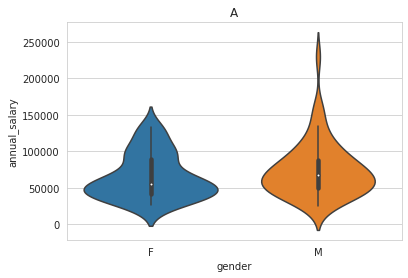

In [0]:
sns.violinplot(x='gender',y='annual_salary',data=merged_df)

plt.title("A")
plt.show()

In [0]:
import plotly.express as px

df = merged_df
fig = px.violin(df,x='gender', y="annual_salary", box=True,color='gender')
fig.show()

In [0]:
data.set_index('date',inplace=True)

In [0]:
credit=data[data['movement']=='credit'].amount.resample('M').sum()

movement,credit,debit
date,,
2018-08-01,1870.884615,44.729355
2018-08-02,1422.823000,53.225986
2018-08-03,2004.045333,56.590845
2018-08-04,NaN,53.356356
2018-08-05,NaN,44.265000
...,...,...
2018-10-27,NaN,50.155252
2018-10-28,NaN,59.007762
2018-10-29,2251.872500,29.292791


In [0]:
ez_mean=data.groupby(['movement']).amount.resample('M').mean().unstack('movement')

In [0]:
ez_sum=data.groupby(['movement']).amount.resample('M').sum().unstack('movement')

In [0]:
ez_median=data.groupby(['movement']).amount.resample('M').median().unstack('movement')

In [0]:
type(ez_sum)

pandas.core.frame.DataFrame

In [0]:
a=ez_sum.index

In [0]:
c=ez_sum['credit']
d=ez_sum['debit']

In [0]:
ez_sum.index

DatetimeIndex(['2018-08-31', '2018-09-30', '2018-10-31'], dtype='datetime64[ns]', name='date', freq='M')

In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='credit', x=ez_sum.index, y=ez_sum['credit']),
    go.Bar(name='debit', x=ez_sum.index, y=ez_sum['debit'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [0]:
type(ez_mean)

pandas.core.series.Series

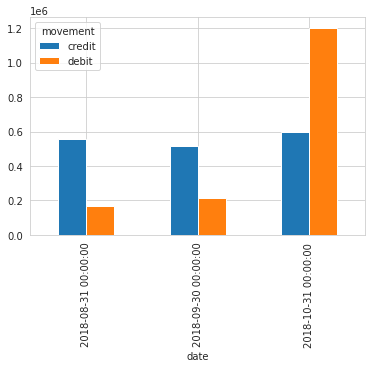

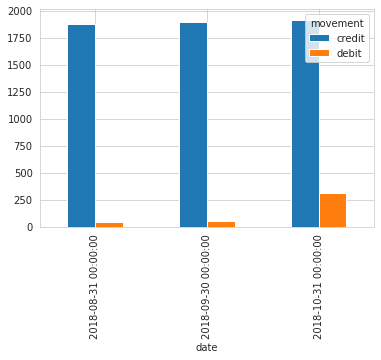

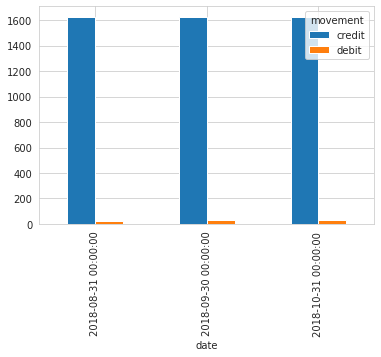

In [0]:
ez_sum.plot(kind='bar')
ez_mean.plot(kind='bar')
ez_median.plot(kind='bar')
plt.show()

AttributeError: ignored

In [0]:
debit=data[data['movement']=='debit'].amount.resample('M').sum()

In [0]:
pd.concat([credit,debit],axis='columns')

,amount,amount
date,,
2018-08-31,559814.33,170121.19
2018-09-30,516595.61,213954.60
2018-10-31,600166.91,1202630.56


In [0]:
q.head(5)

AttributeError: ignored

In [0]:
salary_df=data[data['txn_description'].str.contains("PAY/SALARY")]

In [0]:
salary_df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [0]:
salary_df['Day']=salary_df.date.dt.dayofyear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
salary_df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Day,Cycle
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,213,14.0
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,213,7.0
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,213,7.0
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,213,14.0
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,213,7.0


In [0]:
salary_df['Cycle']=salary_df.groupby('customer_id')['Day'].diff(-1) * (-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
a.shape

(876, 24)

In [0]:
(a.groupby(['customer_id'],as_index=False).mean().groupby('customer_id')['Cycle'].mean())

customer_id
CUS-1005756958     7.000000
CUS-1117979751    14.000000
CUS-1140341822    14.000000
CUS-1147642491     7.000000
CUS-1196156254    14.000000
                    ...    
CUS-72755508       7.636364
CUS-809013380      7.000000
CUS-860700529     16.800000
CUS-880898248     16.800000
CUS-883482547     14.000000
Name: Cycle, Length: 100, dtype: float64

In [0]:
a['Cycle']=a.groupby('customer_id')['Day'].diff(-1) * (-1)

In [0]:
final=a.groupby(["customer_id",'Cycle'],as_index=False).mean()

In [0]:
b=a.groupby('customer_id')

AttributeError: ignored

In [0]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [0]:
t=data.groupby(['customer_id','date'])

In [0]:
#t.groups

In [0]:
t.size()

customer_id     date      
CUS-1005756958  2018-08-02    2
                2018-08-03    3
                2018-08-04    3
                2018-08-05    2
                2018-08-06    1
                             ..
CUS-883482547   2018-10-27    2
                2018-10-28    3
                2018-10-29    5
                2018-10-30    1
                2018-10-31    1
Length: 5521, dtype: int64

In [0]:
a=data.groupby(['customer_id','txn_description'])


In [0]:
new=a.filter(like='PAY/SALARY', axis=0)

TypeError: ignored

In [0]:
new.head(5)

customer_id     txn_description
CUS-1005756958  PAY/SALARY         13
CUS-1117979751  PAY/SALARY          7
CUS-1140341822  PAY/SALARY          6
CUS-1147642491  PAY/SALARY         13
CUS-1196156254  PAY/SALARY          7
dtype: int64

In [0]:
av=a.groupby('txn_description')

In [0]:
av.head(5)

customer_id     txn_description
CUS-1005756958  PAY/SALARY         13
                PAYMENT             9
                PHONE BANK          3
                POS                26
                SALES-POS          22
CUS-1117979751  INTER BANK          1
                PAY/SALARY          7
                PAYMENT            40
                POS                26
                SALES-POS          26
CUS-1140341822  INTER BANK          3
                PAY/SALARY          6
                PAYMENT             6
                POS                39
                SALES-POS          26
CUS-1147642491  INTER BANK          2
                PAY/SALARY         13
                PAYMENT            27
                POS                38
                SALES-POS          38
CUS-1196156254  INTER BANK          5
                PAY/SALARY          7
                PAYMENT            70
                POS                74
                SALES-POS          89
CUS-1271030853  IN

In [0]:
a['CUS-2487424745']

txn_description
INTER BANK     16
PAY/SALARY     14
PAYMENT        17
POS           259
SALES-POS     272
dtype: int64

In [0]:
b=data.groupby(['customer_id','txn_description'])['amount'].apply(sum)

In [0]:
ag=data.groupby(['customer_id','txn_description','age','gender'])['amount'].apply(sum)

In [0]:
ag

customer_id     txn_description  age  gender
CUS-1005756958  PAY/SALARY       53   F         12616.11
                PAYMENT          53   F          1296.00
                PHONE BANK       53   F           546.00
                POS              53   F           748.01
                SALES-POS        53   F          1062.85
                                                  ...   
CUS-883482547   PAY/SALARY       19   F         27842.22
                PAYMENT          19   F          4298.00
                PHONE BANK       19   F           793.00
                POS              19   F          1562.39
                SALES-POS        19   F          2143.80
Name: amount, Length: 483, dtype: float64

In [0]:
b

customer_id     txn_description
CUS-1005756958  PAY/SALARY         12616.11
                PAYMENT             1296.00
                PHONE BANK           546.00
                POS                  748.01
                SALES-POS           1062.85
                                     ...   
CUS-883482547   PAY/SALARY         27842.22
                PAYMENT             4298.00
                PHONE BANK           793.00
                POS                 1562.39
                SALES-POS           2143.80
Name: amount, Length: 483, dtype: float64

In [0]:
ag_1=ag.filter(like='PAY/SALARY', axis=0)

In [0]:
ag_1

customer_id     txn_description  age  gender
CUS-1005756958  PAY/SALARY       53   F         12616.11
CUS-1117979751  PAY/SALARY       21   M         25050.55
CUS-1140341822  PAY/SALARY       28   M         11499.06
CUS-1147642491  PAY/SALARY       34   F         22248.07
CUS-1196156254  PAY/SALARY       34   F         27326.11
                                                  ...   
CUS-72755508    PAY/SALARY       35   F          8703.84
CUS-809013380   PAY/SALARY       21   F         13481.91
CUS-860700529   PAY/SALARY       30   M         10851.72
CUS-880898248   PAY/SALARY       26   M          8603.88
CUS-883482547   PAY/SALARY       19   F         27842.22
Name: amount, Length: 100, dtype: float64

In [0]:
ag_1.plot.scatter['age']

TypeError: ignored

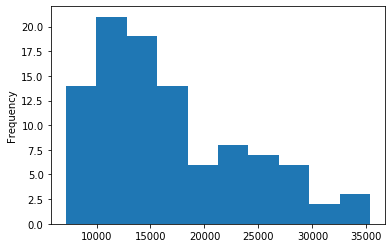

In [0]:
sal_df.plot.hist()

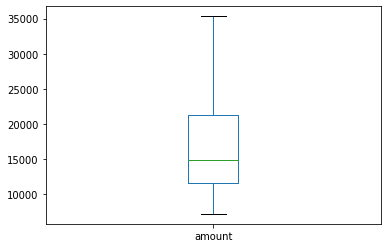

In [0]:
sal_df.plot.box()

In [0]:
data.filter(['customer_id','txn_description'])


,customer_id,txn_description
0,CUS-2487424745,POS
1,CUS-2487424745,SALES-POS
2,CUS-2142601169,POS
3,CUS-1614226872,SALES-POS
4,CUS-2487424745,SALES-POS
...,...,...
12038,CUS-55310383,POS
12039,CUS-2688605418,SALES-POS
12040,CUS-2663907001,POS
12041,CUS-1388323263,SALES-POS


Variable Identification

In [0]:
data.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [0]:
data['customer_id'].unique()

array(['CUS-2487424745', 'CUS-2142601169', 'CUS-1614226872',
       'CUS-2688605418', 'CUS-4123612273', 'CUS-3026014945',
       'CUS-2031327464', 'CUS-2317998716', 'CUS-1462656821',
       'CUS-3142625864', 'CUS-860700529', 'CUS-2370108457',
       'CUS-2630892467', 'CUS-3716701010', 'CUS-3378712515',
       'CUS-2695611575', 'CUS-1669695324', 'CUS-3255104878',
       'CUS-537508723', 'CUS-2376382098', 'CUS-3129499595',
       'CUS-883482547', 'CUS-51506836', 'CUS-1196156254',
       'CUS-2178051368', 'CUS-809013380', 'CUS-3702001629',
       'CUS-127297539', 'CUS-1646183815', 'CUS-164374203',
       'CUS-2283904812', 'CUS-3180318393', 'CUS-3904958894',
       'CUS-1604596597', 'CUS-1617121891', 'CUS-2206365095',
       'CUS-2599279756', 'CUS-3117610635', 'CUS-1433879684',
       'CUS-2500783281', 'CUS-326006476', 'CUS-527400765',
       'CUS-443776336', 'CUS-2663907001', 'CUS-4142663097',
       'CUS-1842679196', 'CUS-3249305314', 'CUS-1271030853',
       'CUS-1646621553', 'CUS-32514

Univariate analysis of continous variables

In [0]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


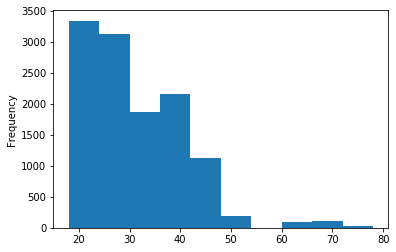

In [0]:
data['age'].plot.hist()

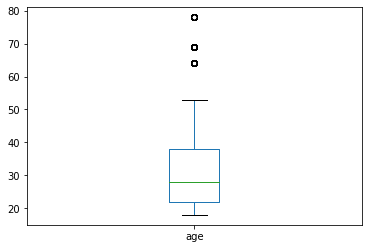

In [0]:
data['age'].plot.box()

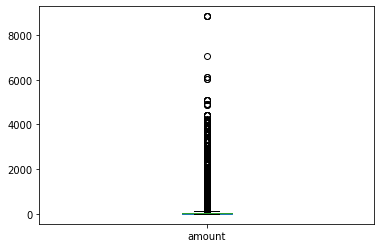

In [0]:
data['amount'].plot.box()

Univariate Analysis of Categorical Variables

In [0]:
data['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [0]:
data['gender'].value_counts()/len(data['gender'])

M    0.52188
F    0.47812
Name: gender, dtype: float64

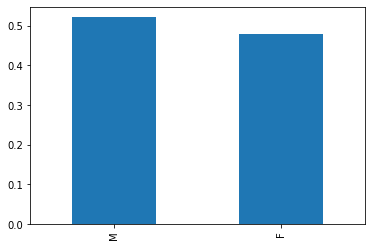

In [0]:
(data['gender'].value_counts()/len(data['gender'])).plot.bar()

Continuous-Continuous Bivariate Analysis

In [0]:
data.plot.scatter()

In [0]:
from fuzzywuzzy import process


/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [0]:
pip install fuzzywuzzy
